<a href="https://colab.research.google.com/github/ronaldbeja/Artificial-intelligence/blob/main/Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TAREA 1 MODELOS DE REGRESION LINEAL
*   Andrea Franco Suárez
*   Andrés Felipe Varela Joven
*   Carlos Andrés Urbano Urbano
*   Hardy Galvis Pedraza
*   Ronal Stiven Bejarano Larrahondo


#INFORMACION GENERAL
Para el proyecto asignado se trabajará con el dataset llamado "Energy Efficiency", el cual busca estimar las cargas de calentamiento y de enfriamiento (es decir, la cantidad de energía que se necesita añadir o remover respectivamente, para poder mantener la temperatura en un rango aceptable) en edificios a partir de sus parametros de construcción.


##Salidas:
* y1: heating load (cargas de calentamiento) 
*y2: Cooling load (carga de enfriamiento) 

## Entradas:
* X1: Relative Compactness (compacidad relativa)
* X2: Surface Area (área superficial)
* X3 Wall Area (área de muro)
* X4 Roof Area (área de techo)
* X5 Overall Height (altura total)
* X6 Orientation (orientación)
* X7 Glazing Area (área de barníz)
* X8 Glazing Area Distribution (distribución del área de barníz)






#PREPROCESAMIENTO DEL DATASET

Importamos las librerias

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Cargamos el dataset

In [ ]:
data=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
features=['R.Compactness','SurfaceArea','WallArea','RoofArea','Height','Orientation','GlazingArea','G.AreaDistribution','HeatingLoad','CoolingLoad']
data.columns=features
data.head()

,R.Compactness,SurfaceArea,WallArea,RoofArea,Height,Orientation,GlazingArea,G.AreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Visualizamos los datos

In [ ]:
#analizamos la informacion de los datos 
data.describe()

,R.Compactness,SurfaceArea,WallArea,RoofArea,Height,Orientation,GlazingArea,G.AreaDistribution,HeatingLoad,CoolingLoad
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


En las siguientes celdas podemos corroborar los tipos de datos de cada feature, saber si hay filas duplicadas y si hay datos faltantes o nulos.

In [ ]:
#verificamos el tipo de de cada uno de los datos
print(data.dtypes,"\n---------\n")

#verificamos el nuevo tamaño de nuestra tabla y la cantidad de datos 
print(data.shape)

R.Compactness         float64
SurfaceArea           float64
WallArea              float64
RoofArea              float64
Height                float64
Orientation             int64
GlazingArea           float64
G.AreaDistribution      int64
HeatingLoad           float64
CoolingLoad           float64
dtype: object 
---------

(768, 10)


In [ ]:
#verificamos si hay filas duplicadas 
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [ ]:
data.count()      # Se usa para contar el número de filas

R.Compactness         768
SurfaceArea           768
WallArea              768
RoofArea              768
Height                768
Orientation           768
GlazingArea           768
G.AreaDistribution    768
HeatingLoad           768
CoolingLoad           768
dtype: int64

In [ ]:
#verificamos que no existan datos nulos 
data.isnull().values.any()

False

##Correlación de las features y las salidas

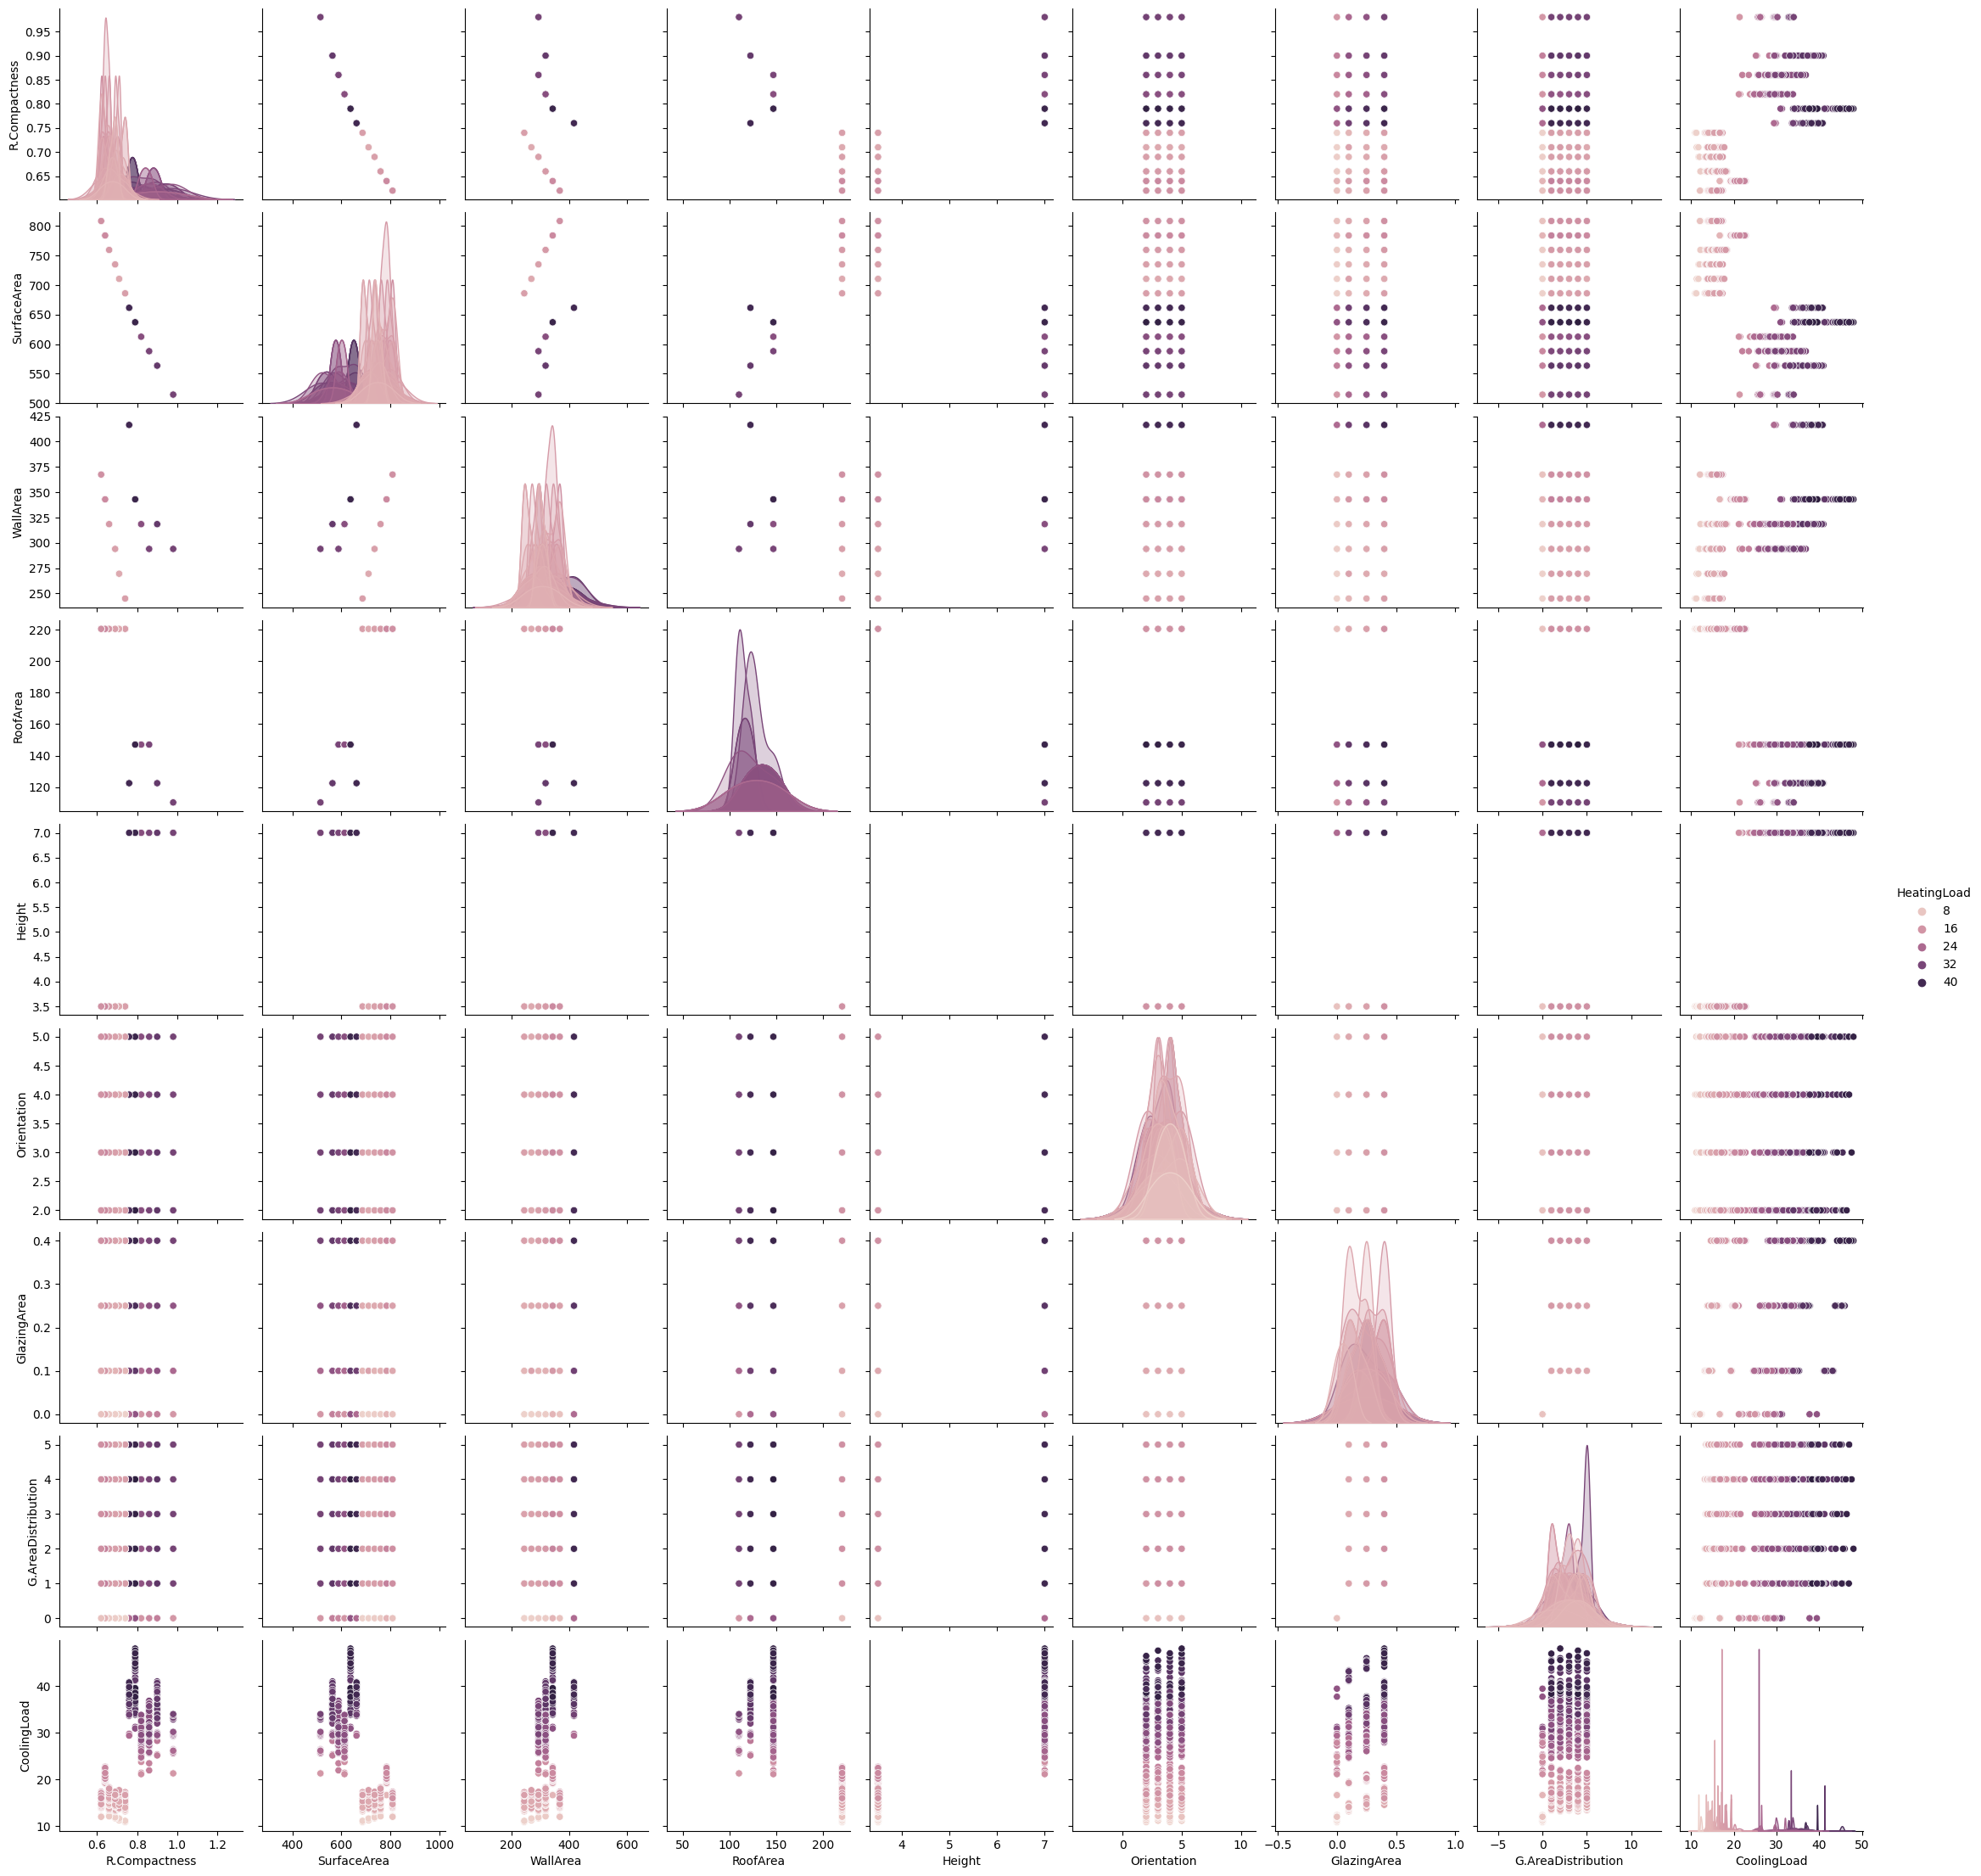

In [ ]:
sns.pairplot(data,hue='HeatingLoad')

Visualización númerica de la correlación

<Axes: >

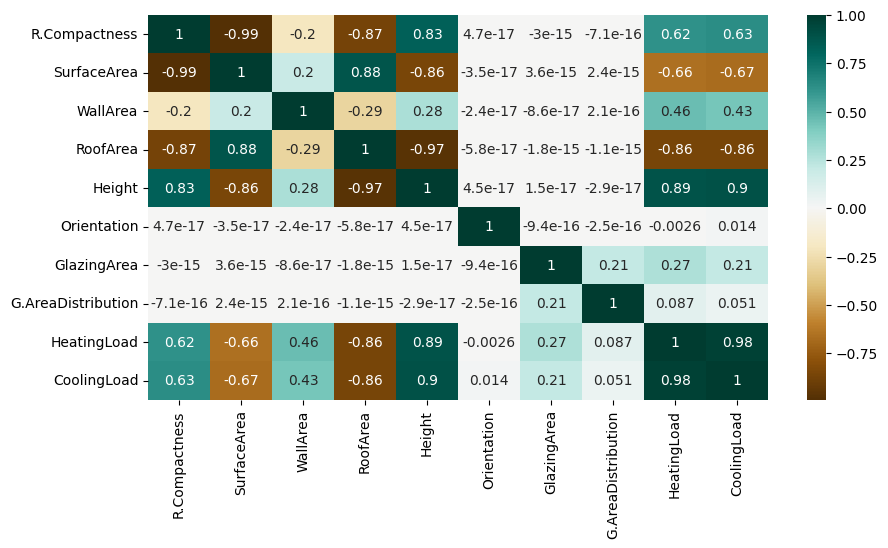

In [ ]:
plt.figure(figsize=(10,5))
c = data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

**Podemos observar como los datos de "GlazingArea" y "G.AreaDistribution" tienen muy  poca correlacion con nuestra salida "HeatingLoad"**

##Distribución de los datos

<Axes: title={'center': 'RoofArea'}, xlabel='RoofArea'>

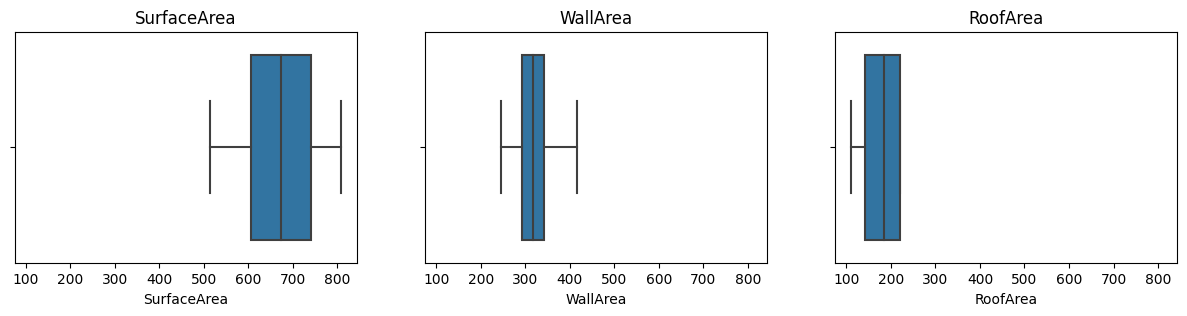

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15, 3))
axes[0].set_title("SurfaceArea")
axes[1].set_title("WallArea")
axes[2].set_title("RoofArea")
sns.boxplot(x=data['SurfaceArea'], ax=axes[0])
sns.boxplot(x=data['WallArea'], ax=axes[1])
sns.boxplot(x=data['RoofArea'], ax=axes[2])

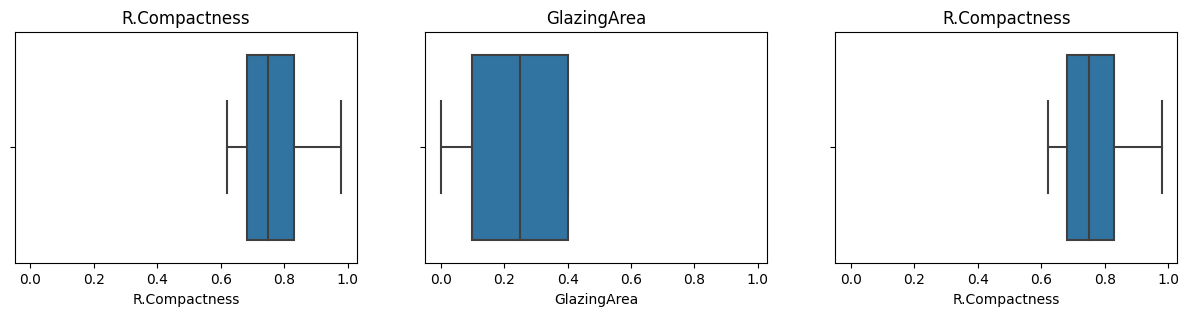

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15, 3))
sns.boxplot(x=data['R.Compactness'], ax=axes[0])
sns.boxplot(x=data['GlazingArea'], ax=axes[1])
sns.boxplot(x=data['R.Compactness'], ax=axes[2])
axes[0].set_title("R.Compactness")
axes[1].set_title("GlazingArea")
axes[2].set_title("R.Compactness")


plt.show()



<Axes: xlabel='Height'>

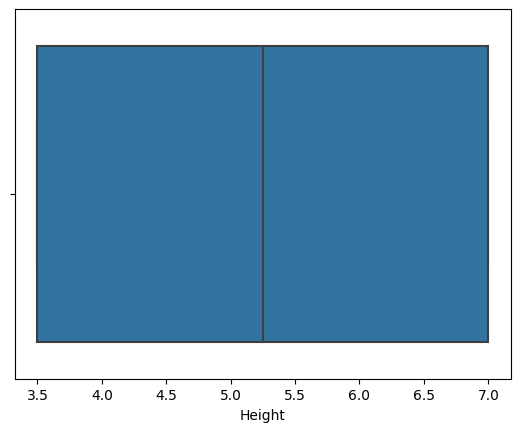

In [ ]:
sns.boxplot(x=data['Height'])

<Axes: xlabel='HeatingLoad'>

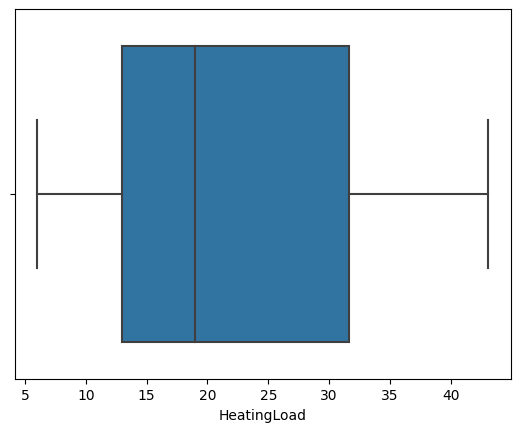

In [ ]:
sns.boxplot(x=data['HeatingLoad'])

In [ ]:
#eliminamos los datos con menor correlacion con la salida
data=data.drop(['Orientation','G.AreaDistribution'],axis=1)
x = data.iloc[:,:-2].values
data.describe()

,R.Compactness,SurfaceArea,WallArea,RoofArea,Height,GlazingArea,HeatingLoad,CoolingLoad
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,0.234375,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,0.133221,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,0.000000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,0.100000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,0.250000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,0.400000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,0.400000,43.100000,48.030000


In [ ]:
#se escoge Heating load como salida debido a su mejor correlacion con algunos atributos
y=data.iloc[:,6]

##Normalización y separación de los datos en set de entrenamiento y testeo

In [ ]:
# se realiza la normalizacion

scaler=preprocessing.StandardScaler().fit(x)
xnorm=scaler.transform(x)
#se divide los datos para entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(xnorm, y, test_size=0.2, random_state=42)


In [ ]:
print(np.amin(X_train))   #valor minimo de nuestras entradas
print(np.amax(X_train))   #valor maximo de nuestras entradas

-1.7858748871144468
2.2478059477960657


[normalizacion](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

#REGRESIÓN LINEAL A PIE: ECUACIÓN NORMAL

A continuación realizaremos regresión lineal en la forma matricial de la ecuación.

$θ = (X^T*X)^{-1}*X^T*Y$





In [ ]:
class Ecuacion_normal():
  def __init__(self):
    
    self.Theta=None

  def fit(self,X,y):
      X = np.hstack((np.ones((X.shape[0], 1)), X))#agregar columna de 1 a primer termino
      self.Theta=(np.linalg.inv(X.T.dot(X))).dot(X.T.dot(y))
      print(self.Theta)

  def predict(self,X):
      X = np.hstack((np.ones((X.shape[0], 1)), X))
      y_hat=X.dot(self.Theta)
      return y_hat

  def error(self,y_test,y_hat):
    from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
    RMSE=np.sqrt(mean_squared_error(y_test, y_hat))
    R2= r2_score(y_test, y_hat)
    MSE = mean_squared_error(y_test, y_hat)

    print(f'MSE: {MSE}')
    print(f'R2: {R2}')
    print(f'RMSE: {RMSE}')


##Entrenamiento

In [ ]:
regressor=Ecuacion_normal()
regressor.fit(X_train,y_train)

[ 22.23993736  -4.71483974 -17.           9.          14.
   7.18768046   2.74779194]


##Predicciones y cálculo de los errores

In [ ]:
y_hat_train=regressor.predict(X_train)
y_hat_test=regressor.predict(X_test)

print("Error de entrenamiento: \n")
regressor.error(y_train,y_hat_train)
print(f'-----------------------------')

print("\nError de validación \n")
regressor.error(y_test,y_hat_test)

Error de entrenamiento: 

MSE: 13.68917608188523
R2: 0.8643614206926147
RMSE: 3.6998886580389456
-----------------------------

Error de validación 

MSE: 14.858013141992148
R2: 0.8574530393726445
RMSE: 3.854609337143279


#SCIKIT LEARN

En esta sección entrenamos el modelo a través de scikit learn usando la regularización Ridge y Lasso buscando disminuir el overfitting.

Estos métodos fuerzan a que los coeficientes del modelo tiendan a cero, minimizando así el riesgo de overfitting, reduciendo varianza, atenuado el efecto de la correlación entre predictores y reduciendo la influencia en el modelo de los predictores menos relevantes.

También se hace la optimización por gradiente descendiente.

##Ridge

La regularización Ridge penaliza la suma de los coeficientes elevados al cuadrado 

$\|\beta\|_2^2 = \sum_{j=1}^{p} \beta_j^2$

. A esta penalización se le conoce como l2 y tiene el efecto de reducir de forma proporcional el valor de todos los coeficientes del modelo pero sin que estos lleguen a cero. El grado de penalización está controlado por el hiperparámetro λ

A medida que λ aumenta, mayor es la penalización y menor el valor de los predictores.



In [ ]:
ridge= linear_model.Ridge(alpha=.1)
#------------------------------------

ridge.fit(X_train,y_train)
pesos=ridge.coef_
bias=ridge.intercept_
print(bias,pesos)

22.256357296944074 [-6.42870561 -3.55042386  0.82799341 -3.86204083  7.22906156  2.74785019]


In [ ]:
yridge_hat_train=ridge.predict(X_train)
yridge_hat_test=ridge.predict(X_test)
#----------------------------------
print("Error de entrenamiento: \n")
print(f'MSE con ridge: {mean_squared_error(y_train, yridge_hat_train)}')
print(f'RMSE con ridge: {np.sqrt(mean_squared_error(y_train, yridge_hat_train))}')
print(f'R2 con ridge: {ridge.score(X_train,y_train)}') 

print(f'-----------------------------')

print("\nError de validación: \n")
print(f'MSE con ridge: {mean_squared_error(y_test, yridge_hat_test)}')
print(f'RMSE con ridge: {np.sqrt(mean_squared_error(y_test, yridge_hat_test))}')
print(f'R2 con ridge: {ridge.score(X_test,y_test)}') 


Error de entrenamiento: 

MSE con ridge: 8.474075249391685
RMSE con ridge: 2.911026494106793
R2 con ridge: 0.9160350103690775
-----------------------------

Error de validación: 

MSE con ridge: 9.223234552641259
RMSE con ridge: 3.0369778650232635
R2 con ridge: 0.9115127951451025


##Lasso

La regularización Lasso penaliza la suma del valor absolutos de los coeficientes de regresión


$\|\beta\|_1=\sum_{j=1}^{p}|\beta_j|$

A esta penalización se le conoce como l1 y tiene el efecto de forzar a que los coeficientes de los predictores tiendan a cero. Dado que un predictor con coeficiente de regresión cero no influye en el modelo, lasso consigue excluir los predictores menos relevantes. Al igual que en ridge, el grado de penalización está controlado por el hiperparámetro λ


In [ ]:
lasso = linear_model.Lasso(alpha=0.1)
#--------------------------------------

lasso.fit(X_train,y_train)
pesos=lasso.coef_
bias=lasso.intercept_
print(bias,pesos)

22.252402702865098 [-0.          0.          2.17361342 -0.          8.246416    2.6693308 ]


In [ ]:
lassoy_hat_train=ridge.predict(X_train)
lassoy_hat_test=ridge.predict(X_test)

#----------------------------------
print("Error de entrenamiento: \n")
print(f'MSE con ridge: {mean_squared_error(y_train, lassoy_hat_train)}')
print(f'RMSE con ridge: {np.sqrt(mean_squared_error(y_train, lassoy_hat_train))}')
print(f'R2 con ridge: {lasso.score(X_train,y_train)}') 

print(f'-----------------------------')

print("\nError de validación: \n")
print(f'MSE con ridge: {mean_squared_error(y_test, lassoy_hat_test)}')
print(f'RMSE con ridge: {np.sqrt(mean_squared_error(y_test, lassoy_hat_test))}')
print(f'R2 con ridge: {lasso.score(X_test,y_test)}') 


Error de entrenamiento: 

MSE con ridge: 8.474075249391685
RMSE con ridge: 2.911026494106793
R2 con ridge: 0.9109874620891981
-----------------------------

Error de validación: 

MSE con ridge: 9.223234552641259
RMSE con ridge: 3.0369778650232635
R2 con ridge: 0.9040086200757008


#GRADIENTE DESCENDENTE

In [ ]:
class LinearRegression:

    def __init__(self, learning_rate=0.1, n_iters=10000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        self.n_samples, self.n_features = X.shape

        # init parameters
        self.weights = np.zeros(self.n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X[:,0], self.weights[0]) + np.dot(X[:,1], self.weights[1]) + + np.dot(X[:,2], self.weights[2]) + np.dot(X[:,3], self.weights[3]) + + np.dot(X[:,4], self.weights[4])+ np.dot(X[:,5], self.weights[5]) +self.bias
            # compute gradients
            dw0 = (1 / self.n_samples) * 2*np.dot(X[:,0].T, (y_predicted - y))
            dw1 = (1 / self.n_samples) * 2*np.dot(X[:,1].T, (y_predicted - y))
            dw2 = (1 / self.n_samples) * 2*np.dot(X[:,2].T, (y_predicted - y))
            dw3 = (1 / self.n_samples) * 2*np.dot(X[:,3].T, (y_predicted - y))
            dw4 = (1 / self.n_samples) * 2*np.dot(X[:,4].T, (y_predicted - y))
            dw5 = (1 / self.n_samples) * 2*np.dot(X[:,5].T, (y_predicted - y))

            db = (1 / self.n_samples) * 2*np.sum(y_predicted - y)

            # update parameters
            self.weights[0] -= self.lr * dw0
            self.weights[1] -= self.lr * dw1
            self.weights[2] -= self.lr * dw2
            self.weights[3] -= self.lr * dw3
            self.weights[4] -= self.lr * dw4
            self.weights[5] -= self.lr * dw5

            self.bias -= self.lr * db

        return(self.bias,self.weights)
    def predict(self, X):
        y_approximated = np.dot(X[:,0], self.weights[0]) + np.dot(X[:,1], self.weights[1]) + + np.dot(X[:,2], self.weights[2]) + np.dot(X[:,3], self.weights[3]) + + np.dot(X[:,4], self.weights[4])+ np.dot(X[:,5], self.weights[5]) +self.bias
        return y_approximated

    def error(self,y_test,y_hat):
      from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
      RMSE=np.sqrt(mean_squared_error(y_test, y_hat))
      R2= r2_score(y_test, y_hat)
      MSE = mean_squared_error(y_test, y_hat)

      print(f'MSE: {MSE}')
      print(f'R2: {R2}')
      print(f'RMSE: {RMSE}')

In [ ]:
gradiente=LinearRegression()
#--------------------------------------

b,w=gradiente.fit(X_train,y_train)

y_predictedgrad_train=gradiente.predict(X_train)
y_predictedgrad_est=gradiente.predict(X_test)
y
print(b,w)

22.25654905035011 [-6.5781505  -3.65226025  0.8037613  -3.94964233  7.18790825  2.74779366]


In [ ]:
print("Error de entrenamiento: \n")
gradiente.error(y_train,y_predictedgrad_train)
print(f'-----------------------------')

print("\nError de validación \n")
gradiente.error(y_test,y_predictedgrad_est)

Error de entrenamiento: 

MSE: 8.473855823911473
R2: 0.9160371845364798
RMSE: 2.9109888051848416
-----------------------------

Error de validación 

MSE: 9.21791351740938
R2: 0.9115638448643648
RMSE: 3.036101697474803


# Responder las siguientes preguntas:

• **¿Es posible que se presente el fenómeno de sobreajuste (overfitting) en la regresión lineal? ¿Se presento el fenómeno de sobreajuste en el modelo entrenado?**

Sí, en caso de que hayan valores atípicos el modelo puede ajustarse a ellos y generalizar mal, o bien si los datos de prueba y de entrenamiento son de diferentes distribuciones.


• **¿El data set seleccionado presenta valores atípicos (outliers)? ¿Cómo se identificaron los valores atípicos?**

NO, la identificacion de los outliers se realiza mediante los boxplot que describen la distribucion de datos en terminos de percentelies, maximos y minimos.

• **¿Es necesario eliminar los valores atípicos (outliers)? ¿Por qué sí o por qué no?**

Dependiendo del problema que se este analizando, deben considerarse o no, los outliers pues pueden representar una muestra de interes para el caso de estudio, para este caso la distancia entre la media y los outliers no representa un valor demasiado alejado lo que nos permite tener un dataset que no necesite modificar alguna de sus muestras. cabe aclarar que el analsis de los datros se realizó sobre las variables escogidas para la solucion, eliminando las que no tienen mayor correlacion con la salida.




• **¿Qué es el escalado (Normalization)? ¿Cuándo es necesario?**

El escalado (normalización) es un proceso en el que se ajustan los valores de una variable para que estén dentro de un rango específico o para que tengan una distribución específica. El objetivo del escalado es ayudar a mejorar el rendimiento de los modelos de aprendizaje automático y reducir el impacto de las diferencias en la escala de las características.

El escalado es necesario cuando se trabaja con conjuntos de datos que contienen características con diferentes escalas y rangos de valores. Cuando las características tienen diferentes escalas, puede ser difícil compararlas y utilizarlas para entrenar modelos de aprendizaje automático. Además, algunas técnicas de aprendizaje automático, como la regresión lineal y las redes neuronales, son sensibles a la escala de las características.


• **¿En qué escenario es preferible utilizar el Descenso del Gradiente en lugar de la Regresión Ordinaria por Mínimos Cuadrados (Ecuación Normal) y por qué?**

la Regresión Ordinaria por Mínimos Cuadrados (ecuación normal) es preferible para conjuntos de datos pequeños y modelos simples, mientras que el Descenso del Gradiente es preferible para conjuntos de datos grandes, modelos más complejos y con regularización. La elección entre ambos métodos dependerá de la cantidad de características, la complejidad del modelo, el tamaño del conjunto de datos y los recursos computacionales disponibles.